In [13]:
import serial
import time
from datetime import datetime
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
import glob

# Note: works specifically with the outputs in ss_differential_server as of Nov 26 2023.

In [19]:
data = []
avg_data = []

def first_n_digits(num, n):
    return num // 10 ** (int(math.log(num, 10)) - n + 1)

def sliding_window_average(window_size=5):
    if len(data) < window_size:
        return (None, None)
    subset = data[:window_size]
    avg_int1 = sum(item[0] for item in subset) / window_size
    avg_int2 = sum(item[1] for item in subset) / window_size
    return avg_int1, avg_int2

def update_plot():
    plt.clf()  # Clear the previous plot
    plt.plot(list(map(lambda x: x[2], avg_data)), list(map(lambda x: x[0] - x[1], avg_data)))
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Differential in RSSI signals')
    plt.xlabel('Time')
    plt.ylabel('Difference (dB)')
    # plt.show()
    clear_output(wait=True)
    display(plt.gcf())

def store_data(data1, data2, timestamp, window_size=5):
    data1 = str(data1)[2:-5]
    data2 = str(data2)[2:-5]
    try:
        int1 = int(data1)
        int2 = int(data2)
        if not(abs(int1) > 100 or abs(int2) > 100):
            data.insert(0, (int1, int2, timestamp))
            avg_int1, avg_int2 = sliding_window_average(window_size)
            if avg_int1 != None and avg_int2 != None:
                avg_data.insert(0, (avg_int1, avg_int2, timestamp))
                update_plot()
                # print("Received and stored ints and avgs")
            else:
                # print("Received and stored ints only")
                pass
        else:
            # print("extraneous value detected, not storing.")
            pass
    except Exception as e:
        # print(f'{timestamp} > {data1}, {data2}')
        pass
    

def readserials(pattern = '/dev/cu.SLAB_USBtoUART*', baudrate = 9600):

    matching_files = glob.glob(pattern)

    assert len(matching_files) == 2

    ser1 = serial.Serial(matching_files[0], baudrate, timeout=0.1)         # 1/timeout is the frequency at which the port is read
    ser2 = serial.Serial(matching_files[1], baudrate, timeout=0.1)

    while True:

        data1 = ser1.readline()
        data2 = ser2.readline()

        if data1 and data2:
            timestamp = datetime.now()
            store_data(data1, data2, timestamp)

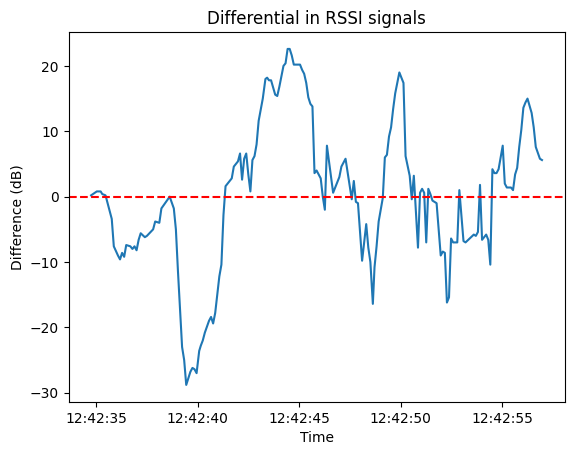

KeyboardInterrupt: 

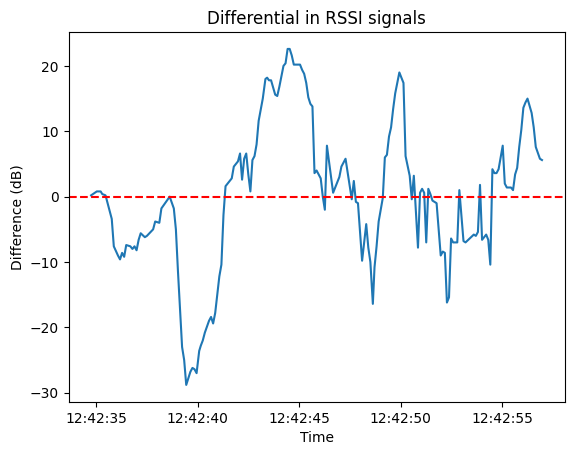

In [20]:
readserials()